### Imports

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

### Reading and understand the data

In [86]:
hd=pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
hd.shape

(1460, 81)

In [88]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
!pip install sweetviz

In [90]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(hd, pairwise_analysis='off')
sweet_report.show_html('Housing_sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Housing_sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data cleaning and preparation

#### Converting categorical columns to Object

In [91]:
hd['MSSubClass'] = hd['MSSubClass'].astype('object')
hd['OverallQual'] = hd['OverallQual'].astype('object')
hd['OverallCond'] = hd['OverallCond'].astype('object')

#### Handling missing values

In [92]:
# Checking percentage of missing values in columns
(round(100*(hd.isnull().sum()/len(hd.index)),2)).to_frame('Nulls').sort_values(by='Nulls', ascending=False).head(20)

,Nulls
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [93]:
# As per data dictionary setting the respective names for NA values
hd['Alley'] = hd['Alley'].replace(np.nan, 'No ally access')
hd['BsmtQual'] = hd['BsmtQual'].replace(np.nan, 'No Basement')
hd['BsmtCond'] = hd['BsmtCond'].replace(np.nan, 'No Basement')
hd['BsmtExposure'] = hd['BsmtExposure'].replace(np.nan, 'No Basement')
hd['BsmtFinType1'] = hd['BsmtFinType1'].replace(np.nan, 'No Basement')
hd['BsmtFinType2'] = hd['BsmtFinType2'].replace(np.nan, 'No Basement')
hd['FireplaceQu'] = hd['FireplaceQu'].replace(np.nan, 'No Fireplace')
hd['GarageType'] = hd['GarageType'].replace(np.nan, 'No Garage')
hd['GarageFinish'] = hd['GarageFinish'].replace(np.nan, 'No Garage')
hd['GarageQual'] = hd['GarageQual'].replace(np.nan, 'No Garage')
hd['GarageCond'] = hd['GarageCond'].replace(np.nan, 'No Garage')
hd['PoolQC'] = hd['PoolQC'].replace(np.nan, 'No Pool')
hd['Fence'] = hd['Fence'].replace(np.nan, 'No Fence')
hd['MiscFeature'] = hd['MiscFeature'].replace(np.nan, 'None')

In [94]:
#checking the distribution of LotFrontage column
hd['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [95]:
hd.loc[np.isnan(hd['LotFrontage']), 'LotFrontage'] = hd['LotFrontage'].median()

In [96]:
hd['MasVnrType'] = hd['MasVnrType'].fillna('None')

In [97]:
hd['MasVnrArea'] = hd['MasVnrArea'].fillna(0)

In [98]:
hd.loc[pd.isnull(hd['Electrical']), 'Electrical'] = 'SBrkr'

In [99]:
hd['GarageYrBlt'] = hd['GarageYrBlt'].fillna(0)

In [100]:
# Again checking the percentage of missing values in columns
(round(100*(hd.isnull().sum()/len(hd.index)),2)).to_frame('Nulls').sort_values(by='Nulls', ascending=False).head(20)

,Nulls
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


In [101]:
# Numeric columns list
numeric_cols = list(hd.select_dtypes(include=['int64', 'float64']).columns)
print(numeric_cols)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [102]:
#Removing 'ID' column
numeric_cols.remove('Id')
print(numeric_cols)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [103]:
hd.select_dtypes(include=['int64', 'float64']).describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [104]:
def remove_outliers(dt, num_list):
    for i in num_list:
        Q1 = dt[i].quantile(0.05)
        Q3 = dt[i].quantile(0.95)
        IQR = Q3 - Q1
        dt = dt[(dt[i] >= Q1-2.5*IQR) & (dt[i] <= Q3+2.5*IQR)]
    return dt

In [105]:
hd = remove_outliers(hd, numeric_cols)

In [106]:
hd.select_dtypes(include=['int64', 'float64']).describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.0,1227.0,1227.000000,1227.000000,1227.000000
mean,734.595762,69.727791,9951.653627,1974.768541,1986.407498,110.028525,454.889976,48.777506,576.610432,1080.277914,1165.277099,347.557457,0.0,1512.834556,0.431133,0.055420,1.566422,0.409128,2.828036,1.0,6.458843,0.641402,1979.365933,1.869601,499.060310,99.005705,47.430318,20.208639,0.0,15.954360,0.0,0.0,6.312143,2007.805216,187129.196414
std,420.668441,19.869293,4750.706061,28.739567,20.293006,182.460365,436.835852,164.402786,444.655680,403.165798,374.812464,433.766085,0.0,494.774640,0.503601,0.232427,0.544389,0.500096,0.733000,0.0,1.503306,0.631046,24.648205,0.638064,186.565803,125.058482,63.249324,58.380332,0.0,55.261129,0.0,0.0,2.685143,1.327476,77993.955137
min,1.000000,21.000000,1300.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.0,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.000000,0.000000,1906.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
25%,371.500000,60.000000,7667.500000,1957.000000,1969.000000,0.000000,0.000000,0.000000,238.500000,816.000000,887.500000,0.000000,0.0,1143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1962.000000,1.000000,362.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,135000.000000
50%,731.000000,69.000000,9531.000000,1977.000000,1996.000000,0.000000,403.000000,0.000000,476.000000,1013.000000,1094.000000,0.000000,0.0,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1982.000000,2.000000,484.000000,26.000000,29.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,170000.000000
75%,1101.500000,79.000000,11645.000000,2003.000000,2004.000000,174.500000,735.000000,0.000000,813.500000,1312.500000,1391.500000,728.500000,0.0,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2003.000000,2.000000,588.000000,174.000000,70.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,221000.000000
max,1460.000000,182.000000,50271.000000,2010.000000,2010.000000,1378.000000,2260.000000,1127.000000,2336.000000,3206.000000,3228.000000,1872.000000,0.0,4676.000000,2.000000,2.000000,3.000000,2.000000,5.000000,1.0,12.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,502.000000,386.000000,0.0,396.000000,0.0,0.0,12.000000,2010.000000,755000.000000


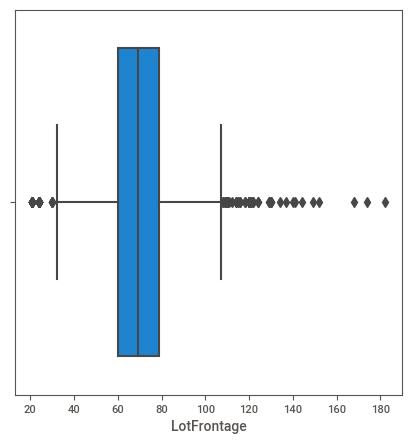

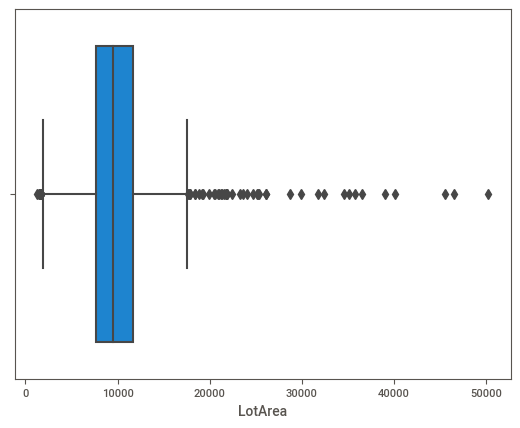

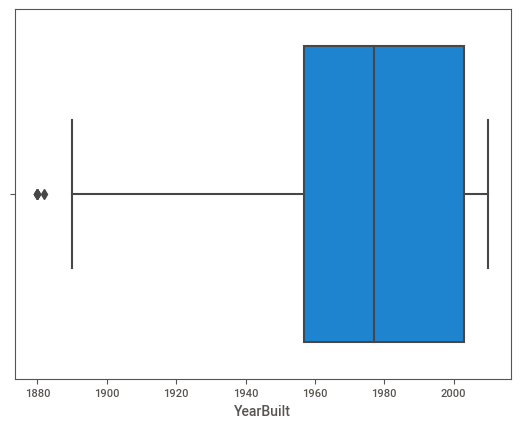

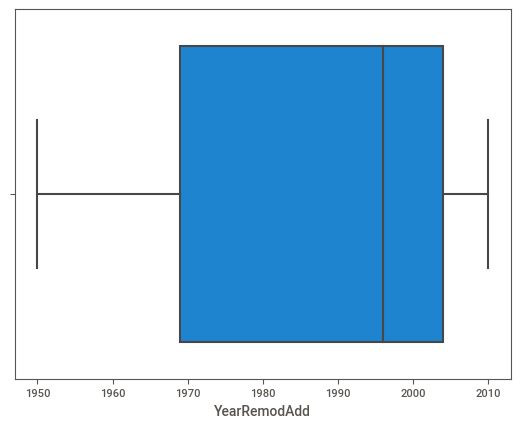

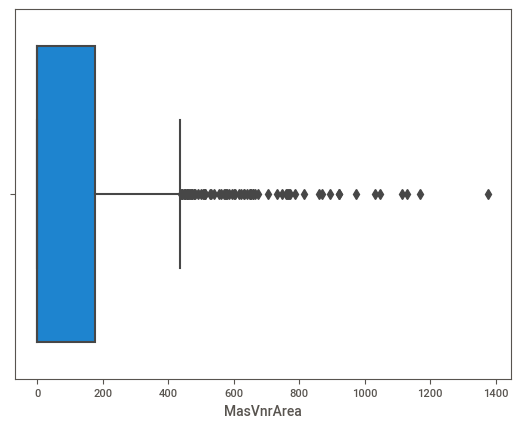

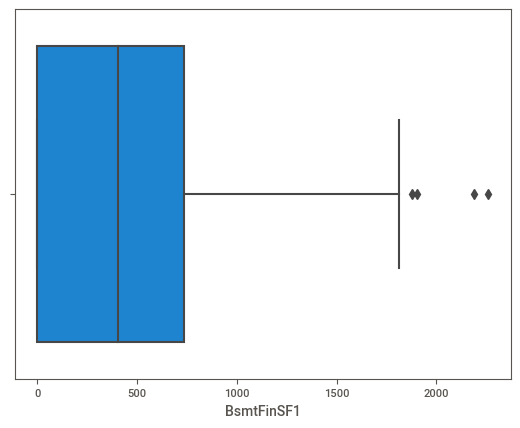

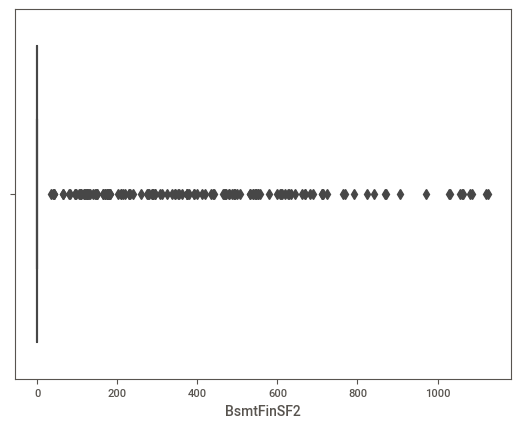

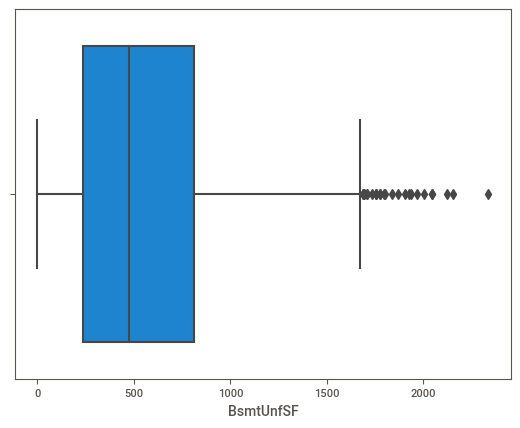

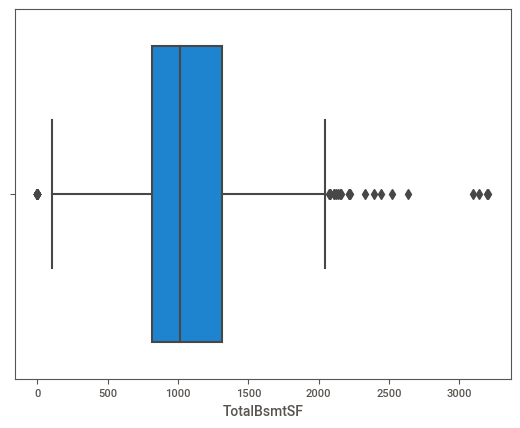

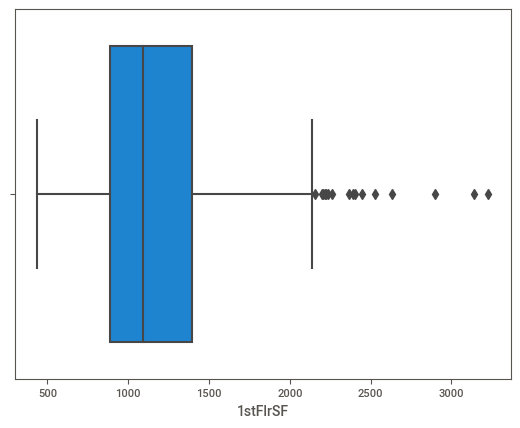

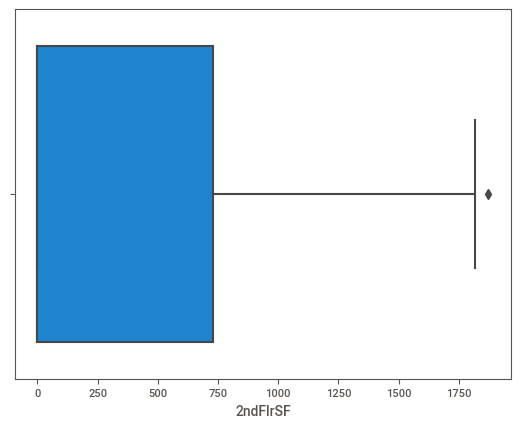

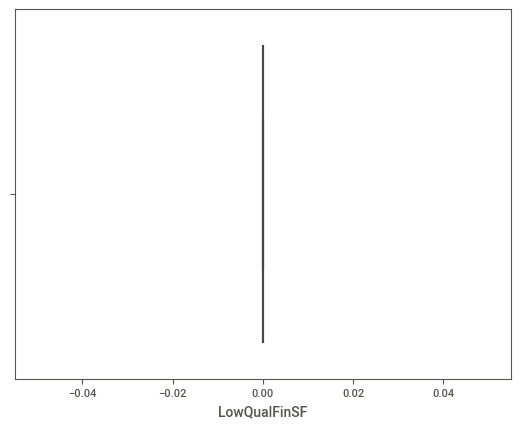

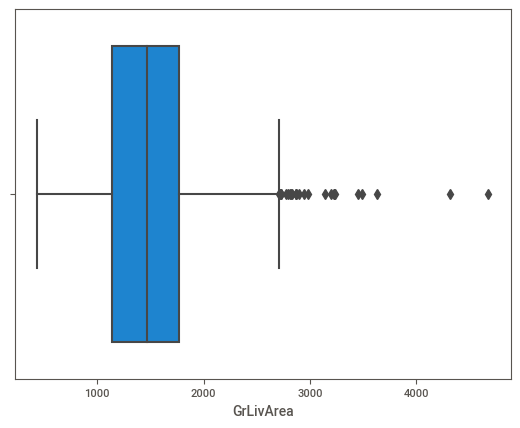

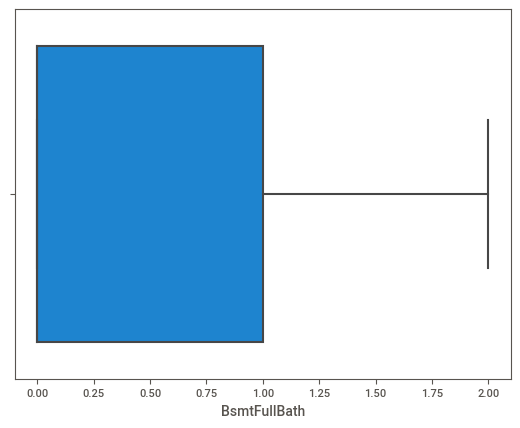

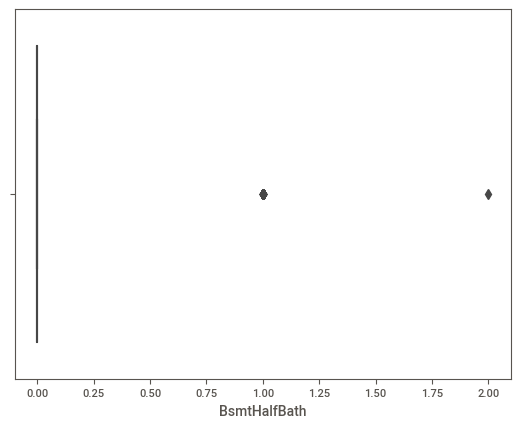

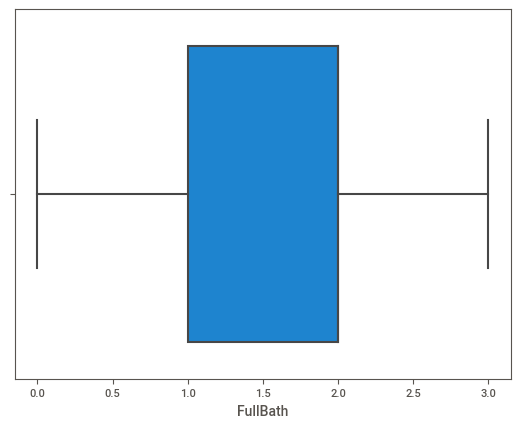

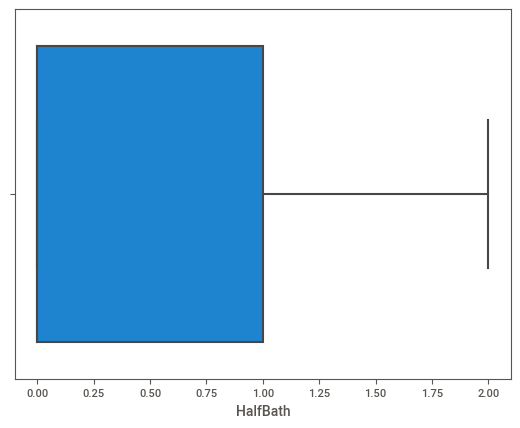

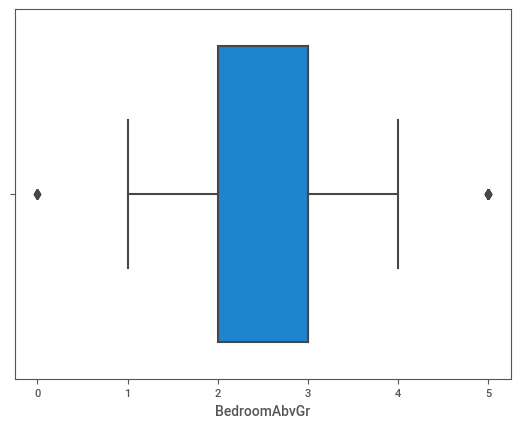

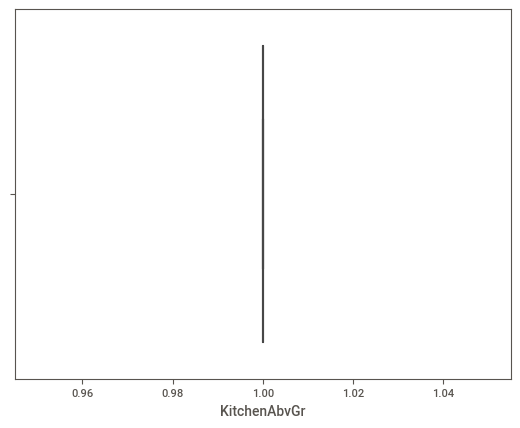

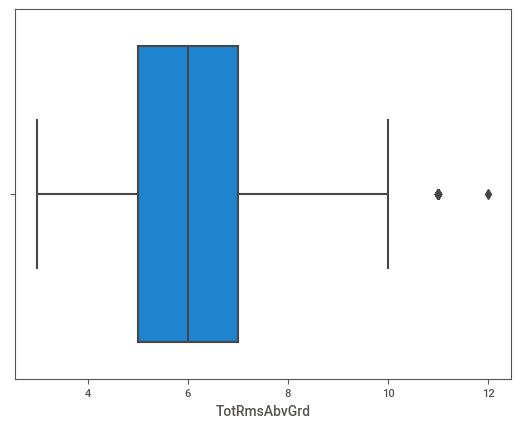

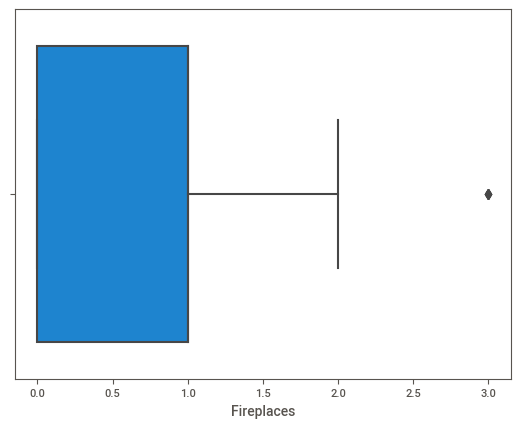

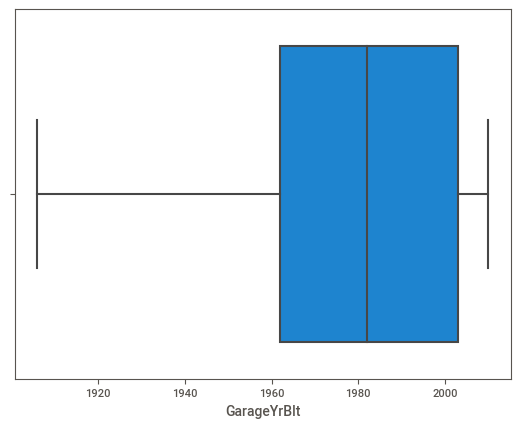

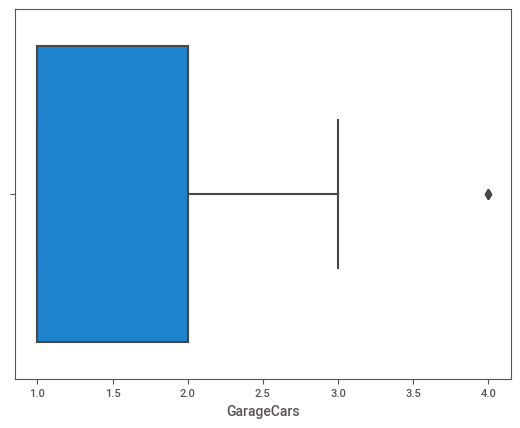

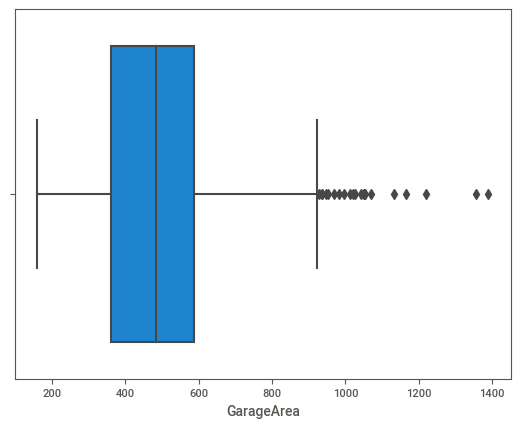

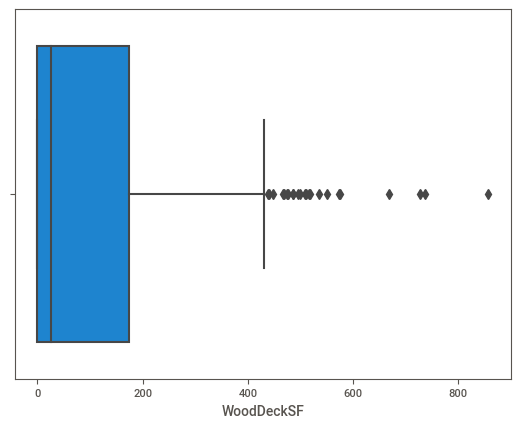

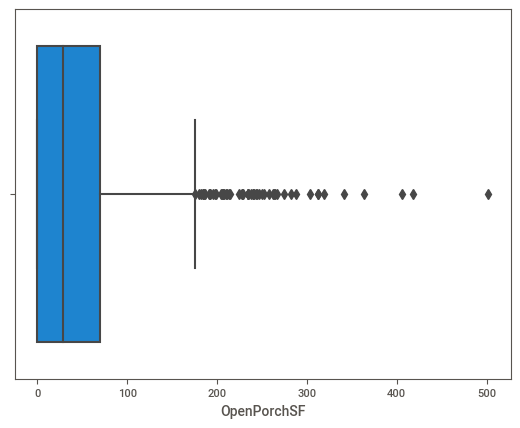

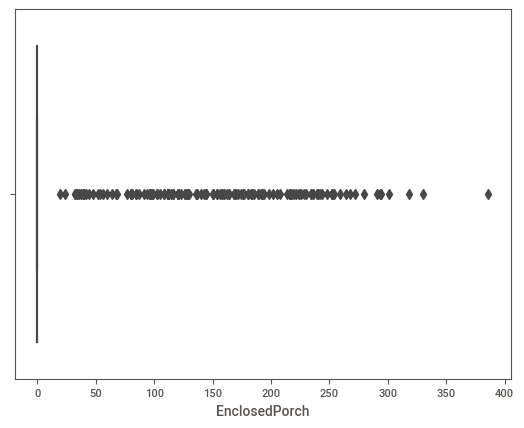

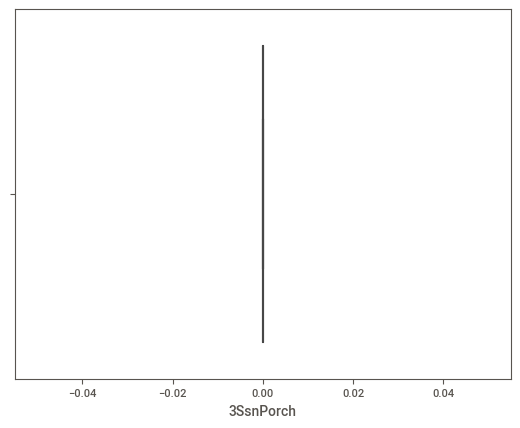

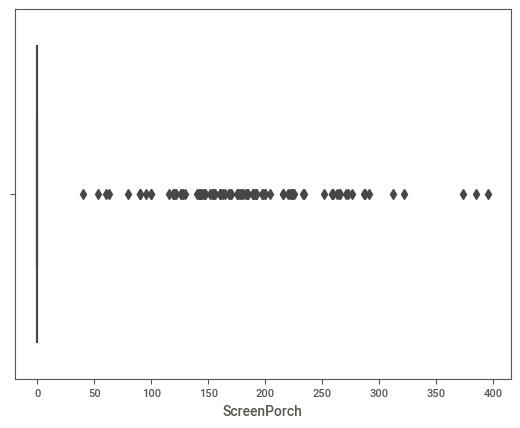

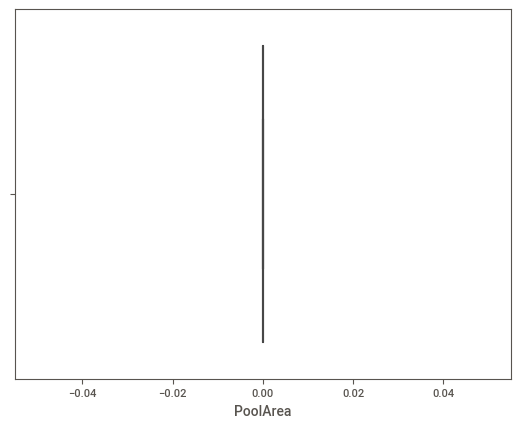

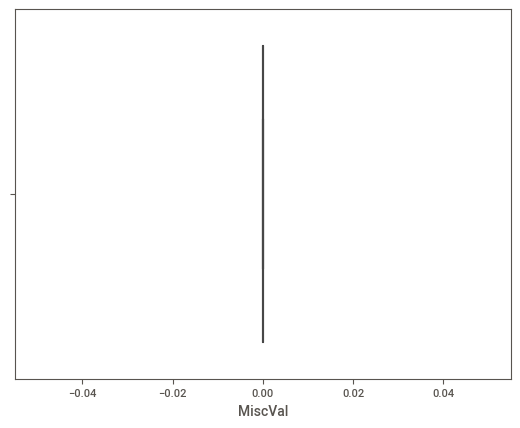

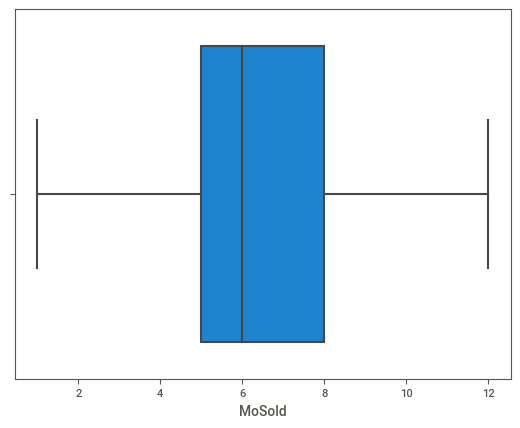

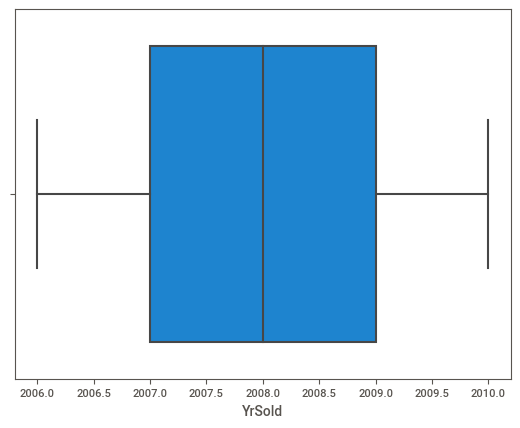

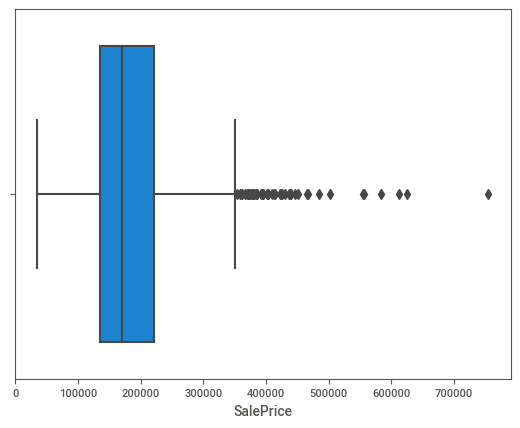

In [107]:
# Plotting numeric columns
plt.figure(figsize=(5,5))
for i in numeric_cols:
    sns.boxplot(x=i, data=hd)
    plt.show()

In [108]:
# Creating derived column
hd['AgeHouse'] = hd['YrSold'] - hd['YearBuilt']

In [109]:
# Removing few columns
hd.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [110]:
#List of categorical columns
category_cols = hd.select_dtypes(include='object').columns
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [111]:
# Removing columns having less value
hd.drop(['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'BldgType', 'RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'], axis=1, inplace=True)

In [112]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1227 non-null   int64  
 1   MSSubClass     1227 non-null   object 
 2   MSZoning       1227 non-null   object 
 3   LotFrontage    1227 non-null   float64
 4   LotArea        1227 non-null   int64  
 5   LotShape       1227 non-null   object 
 6   LotConfig      1227 non-null   object 
 7   Neighborhood   1227 non-null   object 
 8   Condition1     1227 non-null   object 
 9   HouseStyle     1227 non-null   object 
 10  OverallQual    1227 non-null   object 
 11  OverallCond    1227 non-null   object 
 12  RoofStyle      1227 non-null   object 
 13  Exterior1st    1227 non-null   object 
 14  Exterior2nd    1227 non-null   object 
 15  MasVnrType     1227 non-null   object 
 16  MasVnrArea     1227 non-null   float64
 17  ExterQual      1227 non-null   object 
 18  Foundati

In [115]:
# Functionto plot the cahrts
def plot_charts(var, label_rotation):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var)
    plt1=sns.countplot(hd[var], palette=('husl'))
    plt1.set(xlabel = '%s'%var, ylabel='Count of'+ '%s'%var)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var+' vs Price')
    plt2=sns.boxplot(x=hd[var], y=hd.SalePrice, palette=('husl'))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)
        
    plt.show()

In [116]:
hd = hd.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'},
                'LotShape': {'IR2':'Other', 'IR3':'Other'},
                'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'},
                'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'},
                'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'},
                'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'},
                'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'},
                'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'},
                'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'},
                'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'},
                'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'},
                'ExterQual': {'Fa':'Other', 'Ex':'Other'},
                'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'},
                'BsmtQual': {'Fa':'Other', 'No Basement':'Other'},
                'HeatingQC': {'Fa':'Other', 'Po':'Other'},
                'KitchenQual': {'Fa':'Other', 'Ex':'Other'},
                'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'},
                'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'},
                'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'},
                'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'},
                'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})

In [117]:
cat_col = hd.select_dtypes(include=['object']).columns
cat_col

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition'],
      dtype='object')

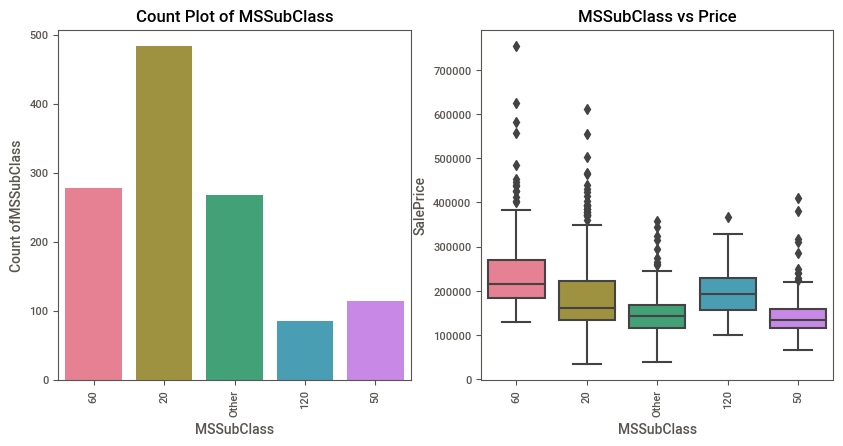

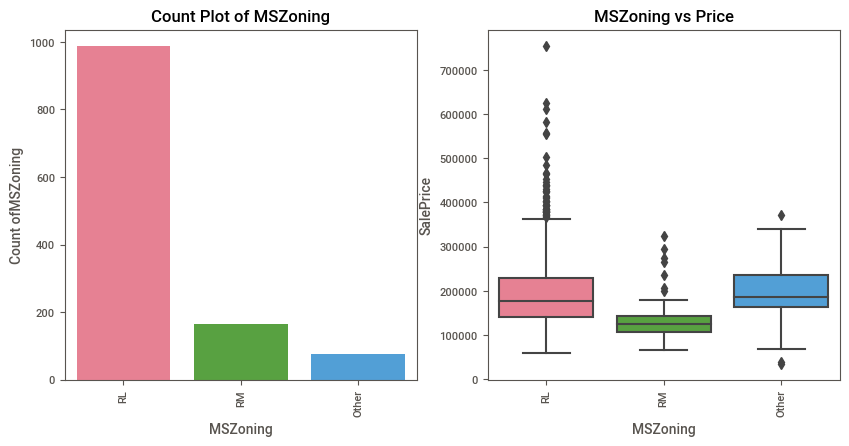

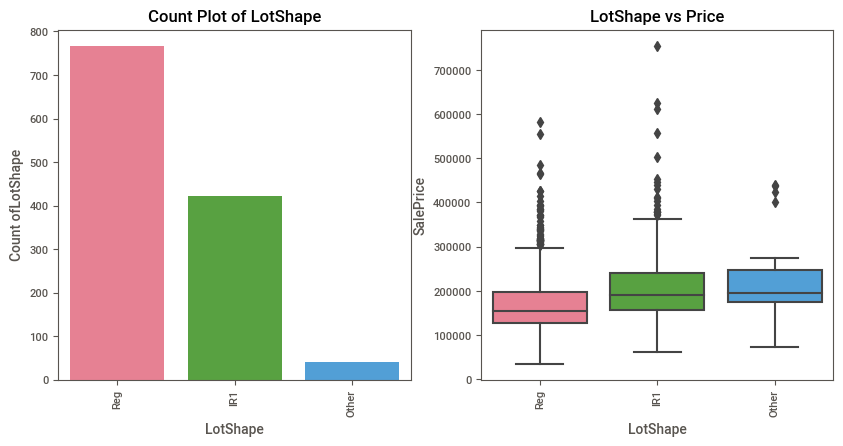

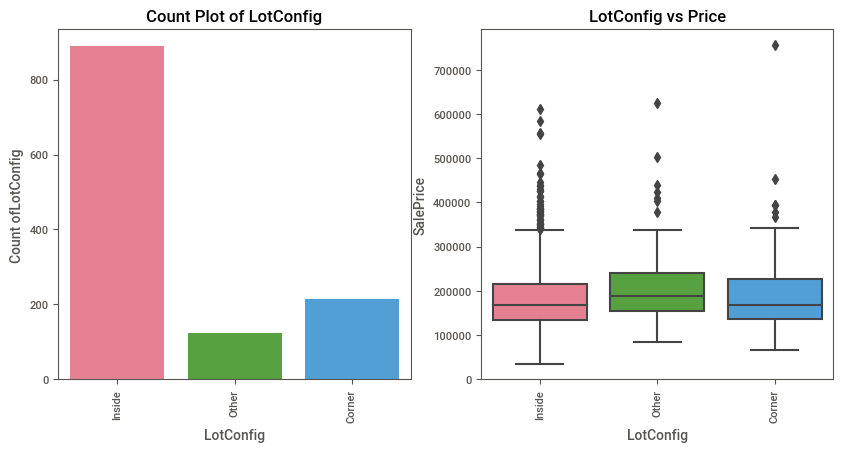

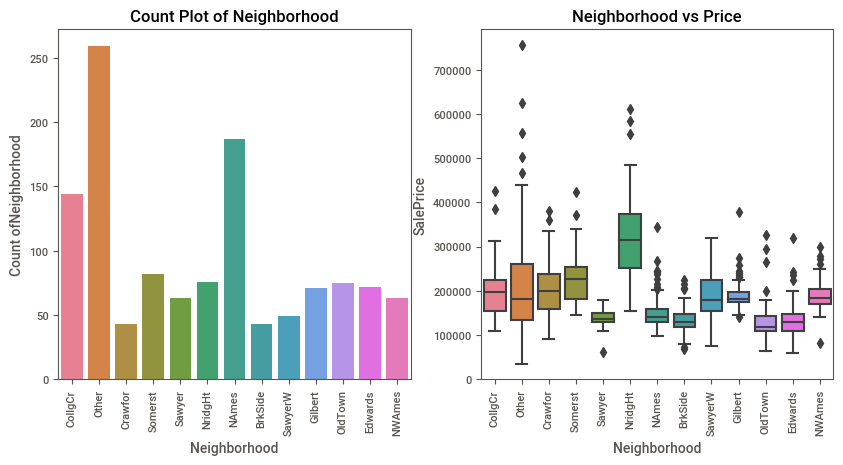

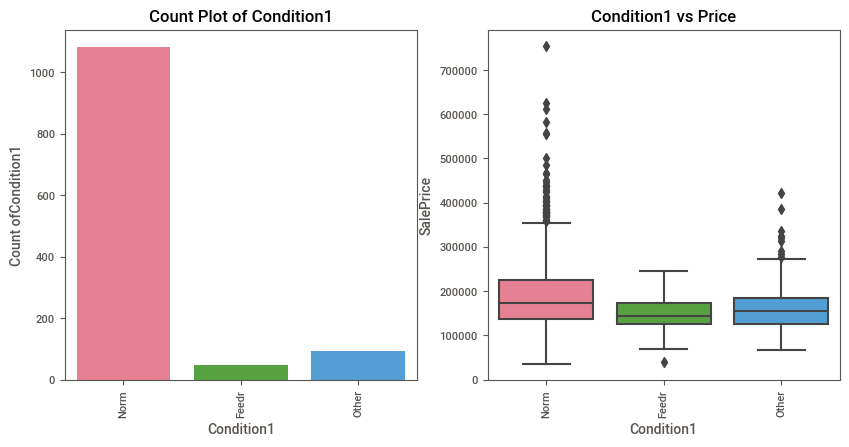

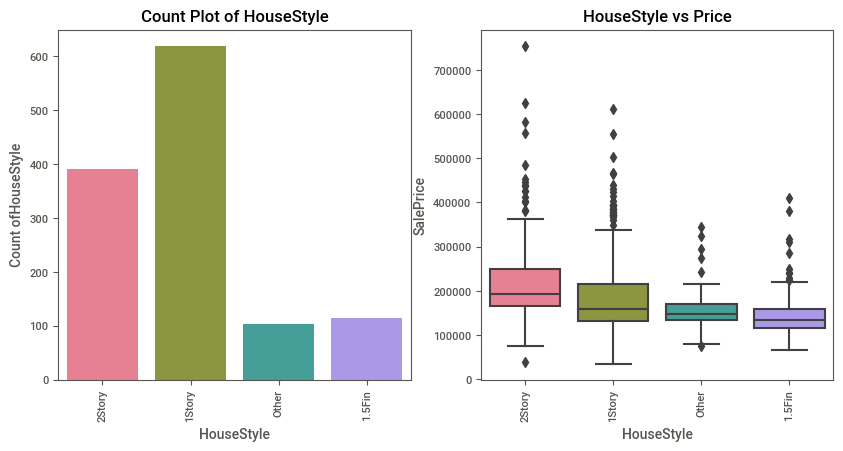

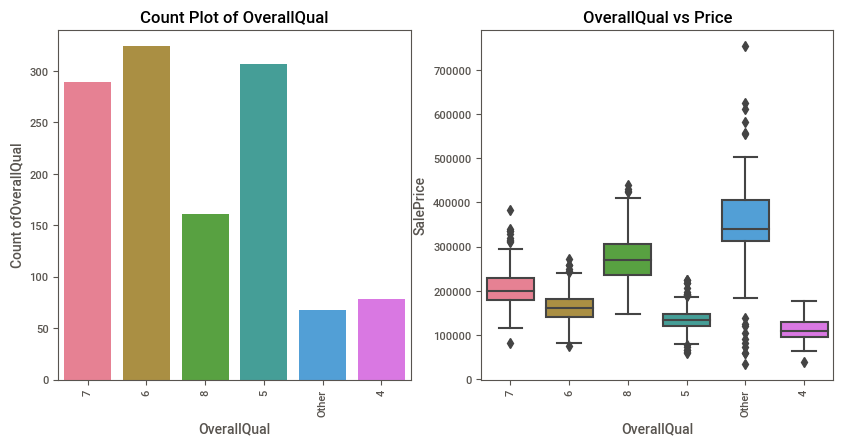

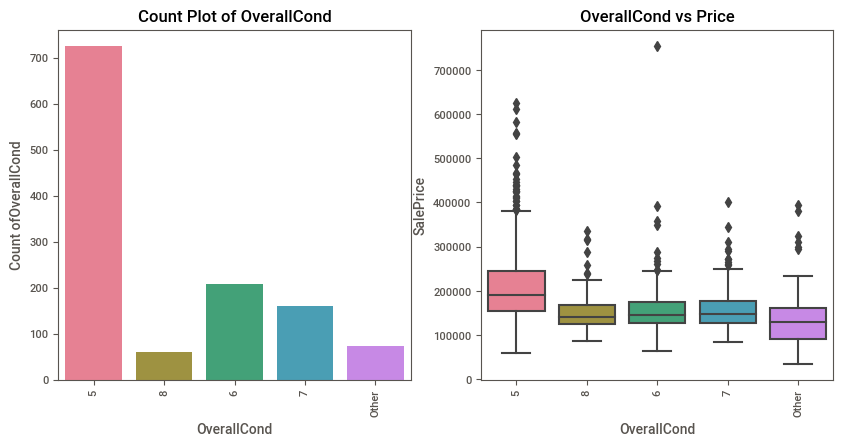

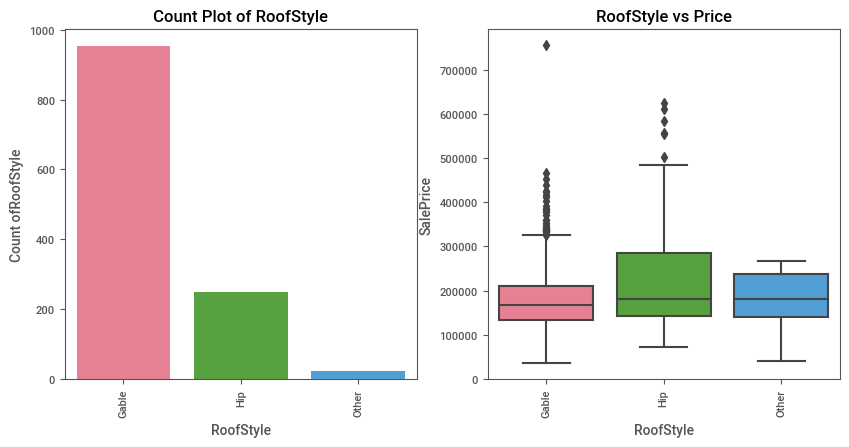

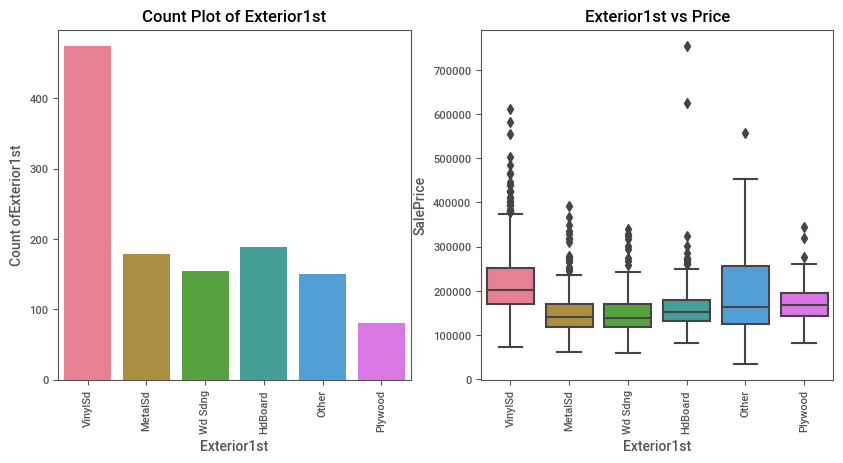

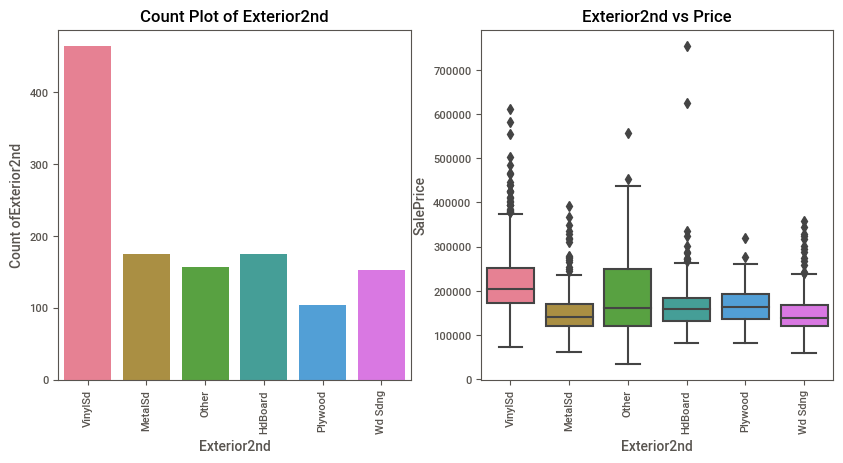

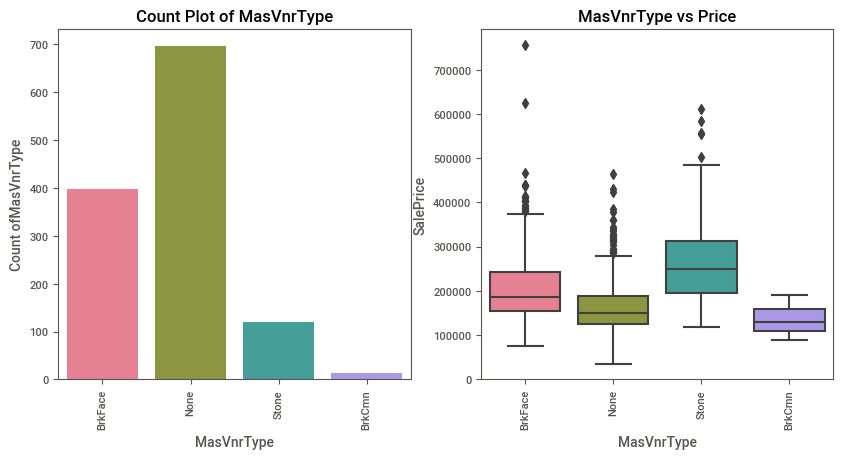

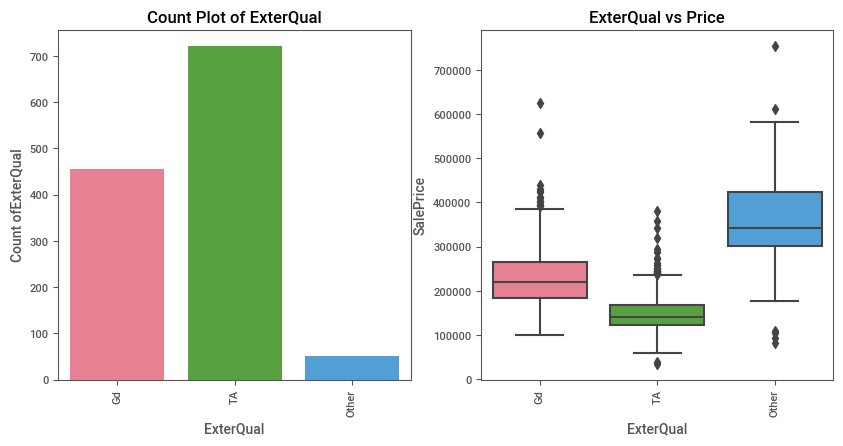

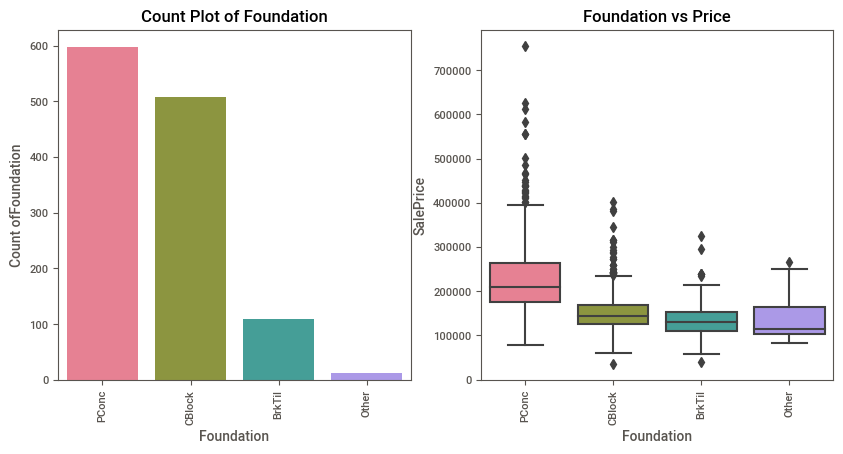

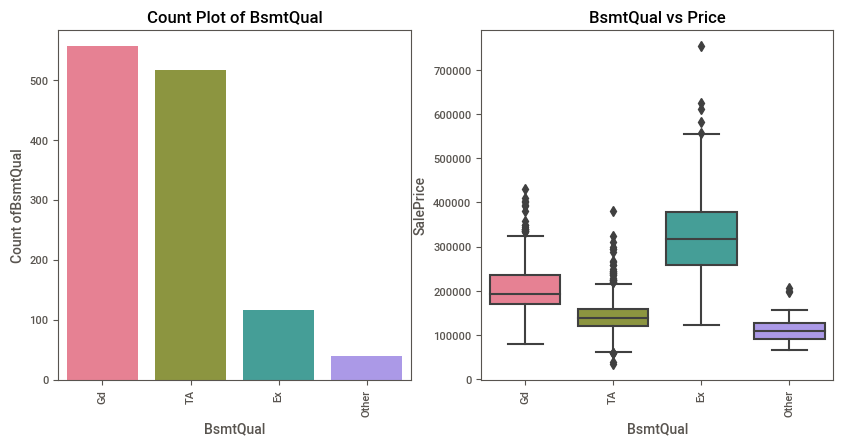

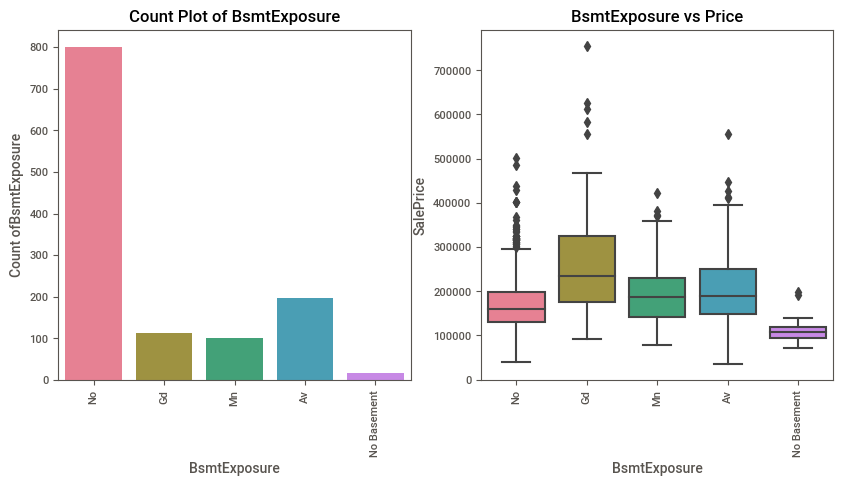

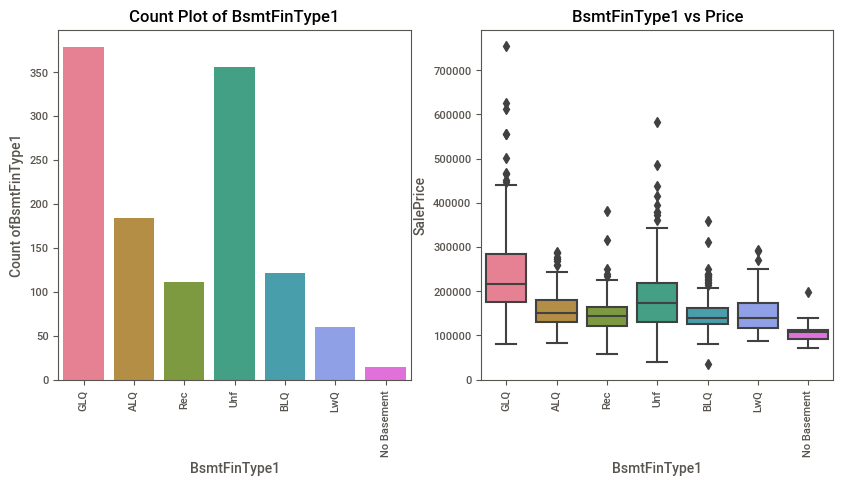

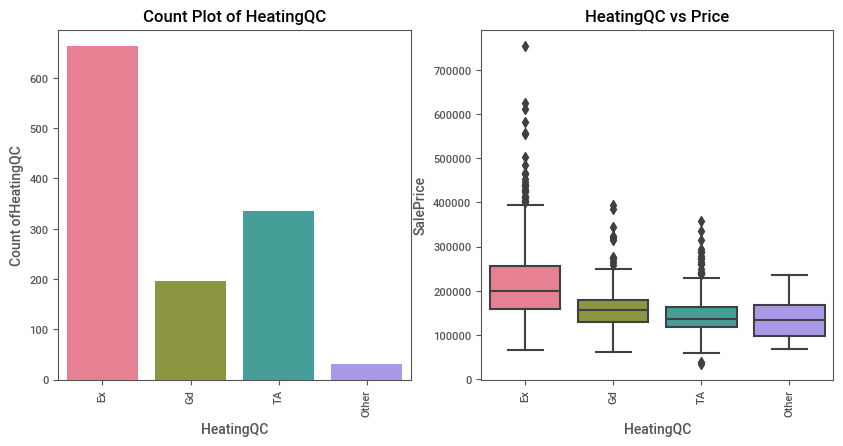

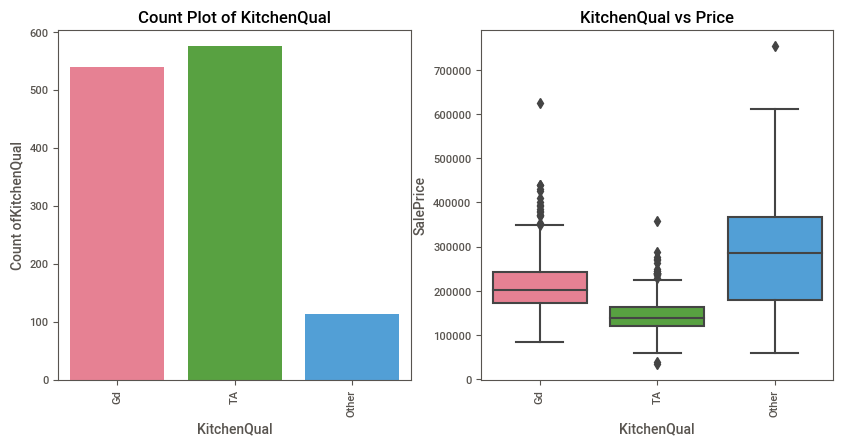

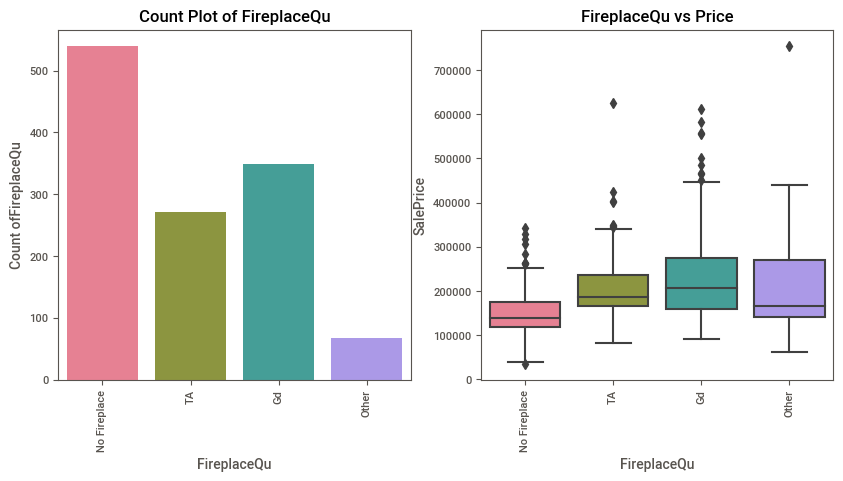

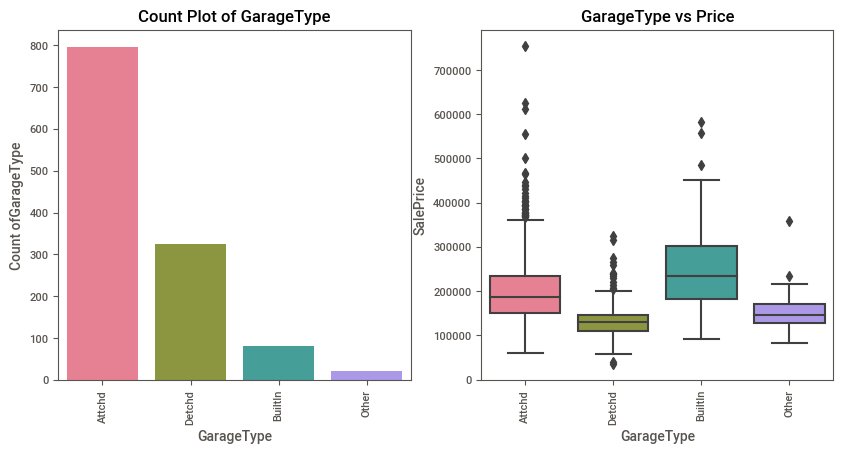

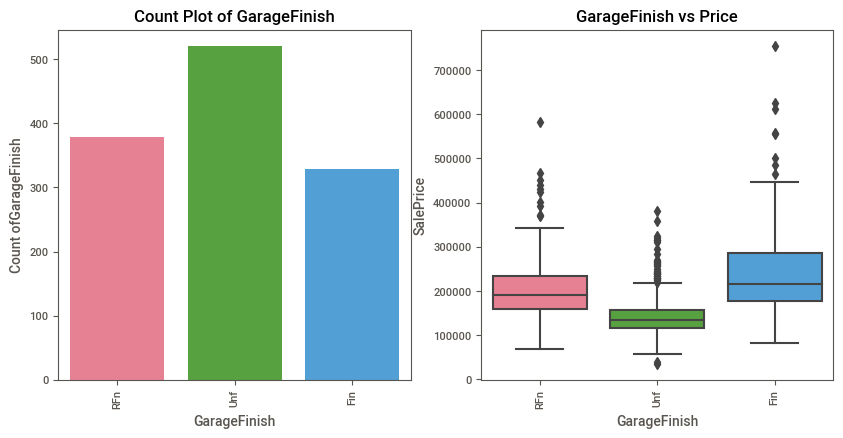

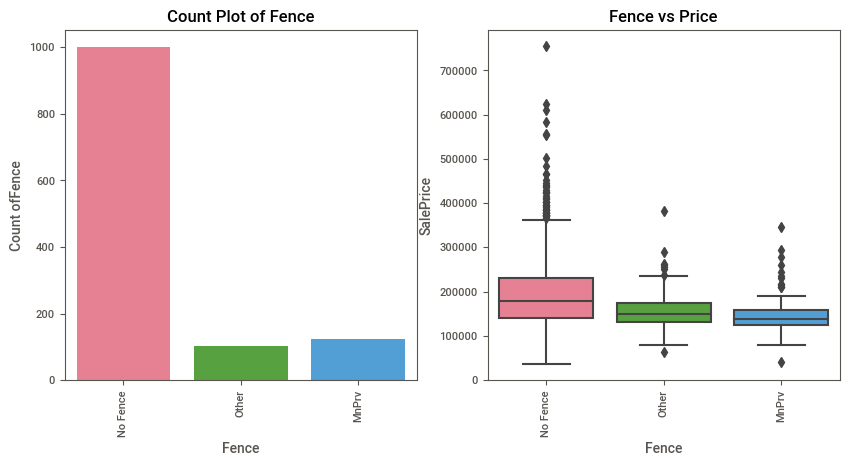

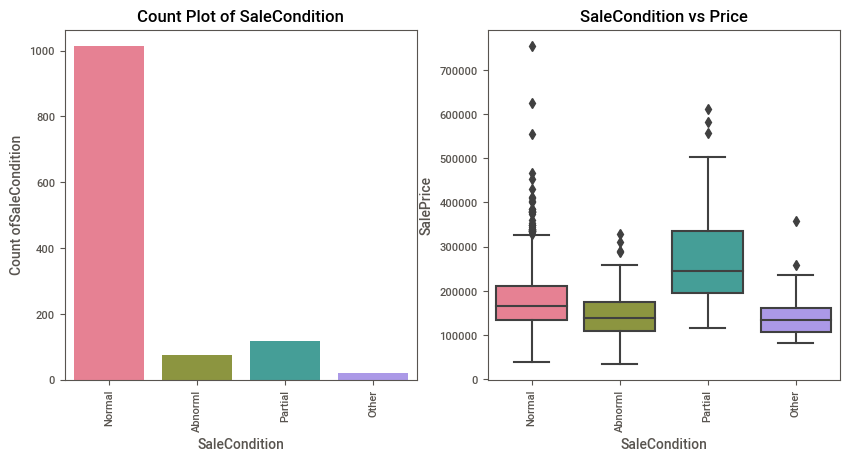

In [118]:
for i in cat_col:
    plot_charts(i, label_rotation=True)

In [119]:
# Categorical dummies
cat_data = hd.select_dtypes(include=['object'])

In [120]:
hd_dummies = pd.get_dummies(cat_data, drop_first=True)
hd_dummies.head()

,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_TA,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [121]:
# Droping categorical columns
hd = hd.drop(list(cat_data.columns), axis=1)

In [122]:
# Concating dummy columns to dataframe
hd = pd.concat([hd, hd_dummies], axis=1)

In [123]:
hd.shape

(1227, 118)

In [124]:
# Dropping ID column
hd = hd.drop('Id', axis=1)

In [125]:
# Variable more than 0.70 correlations
cor = hd.corr().abs()
s = cor.unstack()
sortval = s.sort_values(kind='quicksort', ascending=False)
df_corr = pd.DataFrame(sortval)
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                          0
Exterior2nd_VinylSd      Exterior1st_VinylSd       0.979439
Exterior1st_VinylSd      Exterior2nd_VinylSd       0.979439
Exterior2nd_MetalSd      Exterior1st_MetalSd       0.973677
Exterior1st_MetalSd      Exterior2nd_MetalSd       0.973677
BsmtFinType1_No Basement BsmtExposure_No Basement  0.967846
BsmtExposure_No Basement BsmtFinType1_No Basement  0.967846
FireplaceQu_No Fireplace Fireplaces                0.900008
Fireplaces               FireplaceQu_No Fireplace  0.900008
Exterior2nd_Wd Sdng      Exterior1st_Wd Sdng       0.869748
Exterior1st_Wd Sdng      Exterior2nd_Wd Sdng       0.869748
TotalBsmtSF              1stFlrSF                  0.863966
1stFlrSF                 TotalBsmtSF               0.863966
GarageCars               GarageArea                0.841957
GarageArea               GarageCars                0.841957
2ndFlrSF                 HouseStyle_2Story         0.831759
HouseStyle_2Story        2ndFlrSF       

In [126]:
# Removing higly correlated variable pair
hd = hd.drop(['BsmtFinType1_No Basement', 'Exterior2nd_VinylSd','Exterior1st_MetalSd','Fireplaces','GarageCars',
                           'Exterior1st_Wd Sdng','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','Exterior1st_Other','Foundation_CBlock',
                           'BsmtQual_TA','HouseStyle_2Story','Exterior2nd_Plywood','Condition1_Other','GrLivArea','BsmtQual_Other'],axis=1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

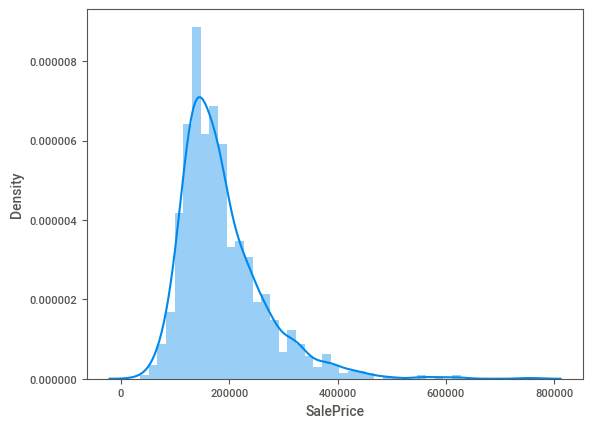

In [127]:
sns.distplot(hd['SalePrice'])

In [128]:
#Auto EDA
sweet_report = sv.analyze(hd, pairwise_analysis='off')
sweet_report.show_html('Housing_sweet_report_after_data_cleaning.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Housing_sweet_report_after_data_cleaning.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Model Building

In [129]:
# Splitting data into train and test set
df_train, df_test = train_test_split(hd, train_size=0.7, test_size=0.3, random_state=100)
df_train.shape, df_test.shape

((858, 100), (369, 100))

In [130]:
# Feature scaling
scaler = StandardScaler()

In [131]:
#Scaling numerical columns
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,HouseStyle_1Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_TA,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
1114,0.984558,-0.964872,-0.598285,-0.091452,-0.309063,-0.349835,-0.616221,0.0,-0.879136,-0.232727,-1.022828,-0.838430,-1.137712,0.0,-0.949827,-0.801678,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.904570,0.689231,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
295,-1.636741,-0.415729,-0.598285,0.841755,-0.309063,-0.871428,-0.195685,0.0,1.116364,-0.232727,-1.022828,-0.838430,0.250847,0.0,0.489231,0.181711,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.576503,-0.367965,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0
719,-0.054070,0.013500,-0.598285,0.158019,-0.309063,-0.282965,-0.274845,0.0,-0.879136,-0.232727,-1.022828,1.148789,0.250847,0.0,-1.092634,-0.801678,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.756618,0.160633,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
273,0.489973,-0.055766,0.396980,0.382081,3.336053,-1.281570,0.390592,0.0,1.116364,-0.232727,0.790367,-0.838430,0.250847,0.0,-0.883916,1.566652,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.621532,0.653991,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
551,-0.993781,-0.835000,-0.598285,-0.338613,-0.309063,0.100428,-0.381216,0.0,-0.879136,-0.232727,-1.022828,-0.838430,0.250847,0.0,-1.158545,-0.801678,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.962464,0.653991,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0


In [132]:
# Creating X_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [133]:
# Scale the test set
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,HouseStyle_1Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_TA,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
632,0.737266,0.442078,0.538384,0.848685,-0.309063,-0.024397,0.751758,0.0,-0.879136,-0.232727,0.790367,-0.838430,0.250847,0.0,0.247557,0.771745,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-1.348425,-0.015566,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
854,1.578060,1.745131,-0.598285,-0.343233,6.069891,-0.452371,1.684358,0.0,1.116364,-0.232727,-1.022828,1.148789,0.250847,0.0,-0.246776,-0.801678,5.828585,-0.35013,0.0,5.214598,0.0,0.0,-0.222705,0.653991,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
631,-1.785117,-1.140200,-0.010915,-0.994629,-0.309063,2.128845,1.167346,0.0,-0.879136,-0.232727,0.790367,-0.838430,-1.137712,0.0,0.703442,0.476728,0.407961,-0.35013,0.0,-0.305671,0.0,0.0,0.285477,-1.108002,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
751,-0.054070,-0.456205,-0.598285,-1.050067,-0.309063,0.189590,-1.044178,0.0,-0.879136,-0.232727,0.790367,1.148789,0.250847,0.0,-0.543376,-0.801678,0.015163,-0.35013,0.0,-0.305671,0.0,0.0,-0.325628,-1.002283,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
619,0.737266,0.516539,0.630840,0.961870,-0.309063,0.080367,0.989237,0.0,1.116364,-0.232727,0.790367,1.148789,1.639405,0.0,1.373537,0.575067,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,1.514120,-0.967043,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [134]:
# Creating X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Linear Regression

In [135]:
# Instantiate the linear regression
lm = LinearRegression()
# Fit the model with train set
lm.fit(X_train, y_train)

LinearRegression()

In [136]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for train model
print("R2 score for train: ", r2_score(y_true = y_train, y_pred = y_train_pred))

R2 score for train:  0.8707849576284449


In [137]:
# Predict the model with test set
y_test_pred = lm.predict(X_test)
# r2 score for train model
print("R2 score for test: ", r2_score(y_true = y_test, y_pred = y_test_pred))

R2 score for test:  0.8562797228587582


In [138]:
mse_test_lr = mean_squared_error(y_train, y_train_pred)
print('MSE', mse_test_lr)
print('RMSE', mse_test_lr**0.5)

MSE 0.1292150423715551
RMSE 0.35946493900178234


In [139]:
# model coefficients
model_parameters = lm.coef_
cols = X_train.columns
cols = cols.insert(0, 'constant')
list(zip(cols, model_parameters))

[('constant', 0.021945837736891804),
 ('LotFrontage', 0.0029333504694982193),
 ('LotArea', 0.10601610654120522),
 ('MasVnrArea', 1330584600762.371),
 ('BsmtFinSF1', 522780214778.5645),
 ('BsmtFinSF2', 1378869558785.888),
 ('BsmtUnfSF', -1242466207883.861),
 ('TotalBsmtSF', -500234740824.8335),
 ('LowQualFinSF', -0.002911271719752917),
 ('BsmtFullBath', 0.00762939453125),
 ('BsmtHalfBath', 0.14713287353515625),
 ('FullBath', 0.086669921875),
 ('HalfBath', 0.049072265625),
 ('BedroomAbvGr', -226631852019.3149),
 ('KitchenAbvGr', 0.09228515625),
 ('GarageArea', 0.0330810546875),
 ('WoodDeckSF', -0.01837158203125),
 ('OpenPorchSF', -0.00439453125),
 ('EnclosedPorch', -9041312005.323734),
 ('3SsnPorch', 0.020263671875),
 ('ScreenPorch', -35379120591.142914),
 ('PoolArea', -8158223399.0738535),
 ('MiscVal', 0.0308837890625),
 ('AgeHouse', -0.09844970703125),
 ('MSSubClass_50', 0.084991455078125),
 ('MSSubClass_60', -0.095428466796875),
 ('MSSubClass_120', -0.104705810546875),
 ('MSSubClass_O

#### Ridge Regression

In [140]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [141]:
# Instantiate Ridge Regression
ridge = Ridge()
folds = 5
model_gridcv = GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
#Fitting the model with train set
model_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [142]:
print('Best estimator:',model_gridcv.best_estimator_)

Best estimator: Ridge(alpha=10.0)


In [143]:
print('Best score:',model_gridcv.best_score_)

Best score: 0.8163734257779186


In [144]:
y_pred_train = model_gridcv.predict(X_train)
y_pred_test = model_gridcv.predict(X_test)

In [145]:
print('R2 score for train: ', r2_score(y_train, y_pred_train))
print('R2 score for test: ', r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train, y_pred_train)
print('MSE', mse_test_lr)
print('RMSE', mse_test_lr**0.5)

R2 score for train:  0.8652495055530232
R2 score for test:  0.8604033804608191
MSE 0.13475049444697687
RMSE 0.36708377033992784


In [146]:
# Dataframe with ridge result
ridge_cv_results = pd.DataFrame(model_gridcv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005482,0.000589,0.003763,0.000671,0.0001,{'alpha': 0.0001},0.802591,0.848457,0.885964,0.825393,0.679487,0.808378,0.070088,23,0.880720,0.869987,0.862593,0.874937,0.895442,0.876736,0.011087
1,0.005809,0.000590,0.003646,0.000602,0.001,{'alpha': 0.001},0.802596,0.848457,0.885967,0.825394,0.679497,0.808382,0.070085,22,0.880720,0.869987,0.862593,0.874937,0.895442,0.876736,0.011087
2,0.005767,0.000568,0.002945,0.000527,0.01,{'alpha': 0.01},0.802643,0.848464,0.885998,0.825401,0.679598,0.808421,0.070055,21,0.880720,0.869987,0.862592,0.874937,0.895442,0.876736,0.011087
3,0.005473,0.000707,0.002966,0.000878,0.05,{'alpha': 0.05},0.802847,0.848490,0.886129,0.825429,0.680034,0.808586,0.069925,20,0.880718,0.869985,0.862590,0.874934,0.895439,0.876733,0.011087
4,0.005306,0.000659,0.002788,0.001299,0.1,{'alpha': 0.1},0.803093,0.848522,0.886284,0.825458,0.680556,0.808783,0.069768,19,0.880709,0.869979,0.862582,0.874928,0.895429,0.876726,0.011086


In [147]:
# Ridge regression with alpha = 10.0
model_ridge = Ridge(alpha=10.0)
# Fitting model with train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [148]:
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)

In [149]:
print('R2 score for train: ', r2_score(y_train, y_pred_train))
print('R2 score for test: ', r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train, y_pred_train)
print('MSE', mse_test_lr)
print('RMSE', mse_test_lr**0.5)

R2 score for train:  0.8652495055530232
R2 score for test:  0.8604033804608191
MSE 0.13475049444697687
RMSE 0.36708377033992784


In [150]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
model_ridge_parameters.insert(0, model_ridge.intercept_)
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))

In [151]:
ridge_param_list

[('constant', -0.082),
 ('LotFrontage', 0.029),
 ('LotArea', 0.009),
 ('MasVnrArea', 0.11),
 ('BsmtFinSF1', 0.141),
 ('BsmtFinSF2', 0.037),
 ('BsmtUnfSF', 0.038),
 ('TotalBsmtSF', 0.209),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', -0.003),
 ('BsmtHalfBath', 0.006),
 ('FullBath', 0.155),
 ('HalfBath', 0.093),
 ('BedroomAbvGr', 0.055),
 ('KitchenAbvGr', 0.0),
 ('GarageArea', 0.103),
 ('WoodDeckSF', 0.035),
 ('OpenPorchSF', -0.012),
 ('EnclosedPorch', -0.005),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.024),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('AgeHouse', 0.024),
 ('MSSubClass_50', -0.035),
 ('MSSubClass_60', 0.092),
 ('MSSubClass_120', -0.056),
 ('MSSubClass_Other', -0.065),
 ('MSZoning_RL', 0.06),
 ('MSZoning_RM', -0.012),
 ('LotShape_Other', 0.058),
 ('LotShape_Reg', -0.029),
 ('LotConfig_Inside', -0.036),
 ('LotConfig_Other', 0.007),
 ('Neighborhood_CollgCr', -0.122),
 ('Neighborhood_Crawfor', 0.296),
 ('Neighborhood_Edwards', -0.192),
 ('Neighborhood_Gilbert', -0.142),
 ('Neighborho

In [152]:
ridge_params_data = pd.DataFrame({'Parameter':cols, 'Coef':model_ridge_parameters})
(ridge_params_data.sort_values('Coef', ascending=False)).head(10)

,Parameter,Coef
53,OverallQual_Other,0.501
35,Neighborhood_Crawfor,0.296
52,OverallQual_8,0.273
85,KitchenQual_Other,0.242
7,TotalBsmtSF,0.209
99,SaleCondition_Partial,0.204
68,ExterQual_Other,0.161
11,FullBath,0.155
66,MasVnrType_None,0.154
55,OverallCond_7,0.154


#### Lasso Regression

In [153]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [155]:
lasso = Lasso()
model_gridcv = GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
#Fitting the model with train set
model_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [156]:
# Creating dataframe with model_cv results
lasso_cv_results = pd.DataFrame(model_gridcv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046118,0.019262,0.003699,0.000788,0.0001,{'alpha': 0.0001},0.803333,0.849197,0.887008,0.826376,0.681622,0.809507,0.069655,2,0.880642,0.869920,0.862525,0.874887,0.895371,0.876669,0.011085
1,0.013684,0.001933,0.002130,0.000293,0.001,{'alpha': 0.001},0.805681,0.854977,0.891542,0.830170,0.692873,0.815049,0.067363,1,0.877935,0.867924,0.859874,0.872118,0.892381,0.874046,0.010893
2,0.006690,0.000651,0.002023,0.000888,0.01,{'alpha': 0.01},0.796446,0.852026,0.891212,0.807882,0.693464,0.808206,0.066505,3,0.848750,0.837868,0.830496,0.841511,0.864551,0.844635,0.011567
3,0.005288,0.000387,0.002314,0.000728,0.05,{'alpha': 0.05},0.726331,0.783012,0.806247,0.670791,0.622907,0.721858,0.068236,4,0.741026,0.741522,0.728533,0.751596,0.770520,0.746640,0.014003
4,0.005749,0.001211,0.002571,0.000465,0.1,{'alpha': 0.1},0.663428,0.739217,0.747633,0.626849,0.604083,0.676242,0.058092,5,0.678889,0.690221,0.678265,0.712020,0.725820,0.697043,0.018874


In [157]:
y_pred_train = model_gridcv.predict(X_train)
y_pred_test = model_gridcv.predict(X_test)

In [158]:
print('R2 score for train: ', r2_score(y_train, y_pred_train))
print('R2 score for test: ', r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train, y_pred_train)
print('MSE', mse_test_lr)
print('RMSE', mse_test_lr**0.5)

R2 score for train:  0.8681952307572566
R2 score for test:  0.8583105423003916
MSE 0.1318047692427434
RMSE 0.3630492655862884


In [159]:
model_gridcv.best_score_

0.8150486207308685

In [160]:
model_gridcv.best_estimator_

Lasso(alpha=0.001)

In [162]:
# Instantiate Lasso regression with alpha=0.002
model_lasso = Lasso(0.001)
# Fitting the model with the train set
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [163]:
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

In [164]:
print('R2 score for train: ', r2_score(y_train, y_pred_train))
print('R2 score for test: ', r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train, y_pred_train)
print('MSE', mse_test_lr)
print('RMSE', mse_test_lr**0.5)

R2 score for train:  0.8681952307572566
R2 score for test:  0.8583105423003916
MSE 0.1318047692427434
RMSE 0.3630492655862884


In [166]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
model_lasso_parameters.insert(0, model_lasso.intercept_)
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', -0.323),
 ('LotFrontage', 0.026),
 ('LotArea', 0.009),
 ('MasVnrArea', 0.104),
 ('BsmtFinSF1', 0.105),
 ('BsmtFinSF2', 0.022),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.238),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', 0.007),
 ('FullBath', 0.147),
 ('HalfBath', 0.085),
 ('BedroomAbvGr', 0.054),
 ('KitchenAbvGr', 0.0),
 ('GarageArea', 0.097),
 ('WoodDeckSF', 0.036),
 ('OpenPorchSF', -0.014),
 ('EnclosedPorch', -0.002),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.024),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('AgeHouse', 0.013),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.116),
 ('MSSubClass_120', -0.057),
 ('MSSubClass_Other', -0.043),
 ('MSZoning_RL', 0.06),
 ('MSZoning_RM', -0.0),
 ('LotShape_Other', 0.066),
 ('LotShape_Reg', -0.02),
 ('LotConfig_Inside', -0.032),
 ('LotConfig_Other', 0.006),
 ('Neighborhood_CollgCr', -0.116),
 ('Neighborhood_Crawfor', 0.394),
 ('Neighborhood_Edwards', -0.181),
 ('Neighborhood_Gilbert', -0.133),
 ('Neighborhood_NAme

In [167]:
# Checking coefficients
lasso_params_data = pd.DataFrame({'Parameter':cols, 'Coef':model_lasso_parameters})
lasso_params_data = lasso_params_data.loc[lasso_params_data['Coef'] != 0]
lasso_params_data.sort_values('Coef', ascending=False).head(10)

,Parameter,Coef
53,OverallQual_Other,0.918
52,OverallQual_8,0.486
35,Neighborhood_Crawfor,0.394
99,SaleCondition_Partial,0.264
76,BsmtExposure_No Basement,0.261
7,TotalBsmtSF,0.238
85,KitchenQual_Other,0.221
55,OverallCond_7,0.167
51,OverallQual_7,0.158
46,Condition1_Norm,0.153


### Observe the change in the coefficiants

In [169]:
coeff = pd.DataFrame(index=X_train.columns)
coeff.rows = X_train.columns
coeff['Linear'] = lm.coef_
coeff['Ridge'] = model_ridge.coef_
coeff['Lasso'] = model_lasso.coef_

pd.set_option('display.max_rows', None)
coeff.head(68)

,Linear,Ridge,Lasso
LotFrontage,2.194584e-02,0.028681,0.026031
LotArea,2.933350e-03,0.009338,0.009294
MasVnrArea,1.060161e-01,0.110041,0.103683
BsmtFinSF1,1.330585e+12,0.140795,0.104932
BsmtFinSF2,5.227802e+11,0.036692,0.021515
BsmtUnfSF,1.378870e+12,0.038193,-0.000000
TotalBsmtSF,-1.242466e+12,0.208605,0.237623
LowQualFinSF,-5.002347e+11,0.000000,0.000000
BsmtFullBath,-2.911272e-03,-0.002673,-0.000079
BsmtHalfBath,7.629395e-03,0.005565,0.006603
